#**Car Price Prediction**

#**Importing libraries**

**importing libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car data.csv')

**Print top five rows of dataset**


In [ ]:
#Top 5 rows of dataset
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Print bottom five rows of dataset**

In [ ]:
#Print bottom five rows of dataset
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


**Shape of Dataset**

In [ ]:
# Shape of Dataset
df.shape

(301, 9)

**Information of Data**

In [ ]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Summary statistic**

In [ ]:
# summary statistic
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Checking of missing Value**

In [ ]:
# check Missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**Check Duplicate values**

In [ ]:
# Check Duplication
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
#Print number of columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#Check datatype
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
# Check the number of unique values of each column
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [ ]:
categorical_columns = ['Fuel_Type','Selling_type','Transmission']

for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")

Category in Fuel_Type is : ['Petrol' 'Diesel' 'CNG']
Category in Selling_type is : ['Dealer' 'Individual']
Category in Transmission is : ['Manual' 'Automatic']


In [ ]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


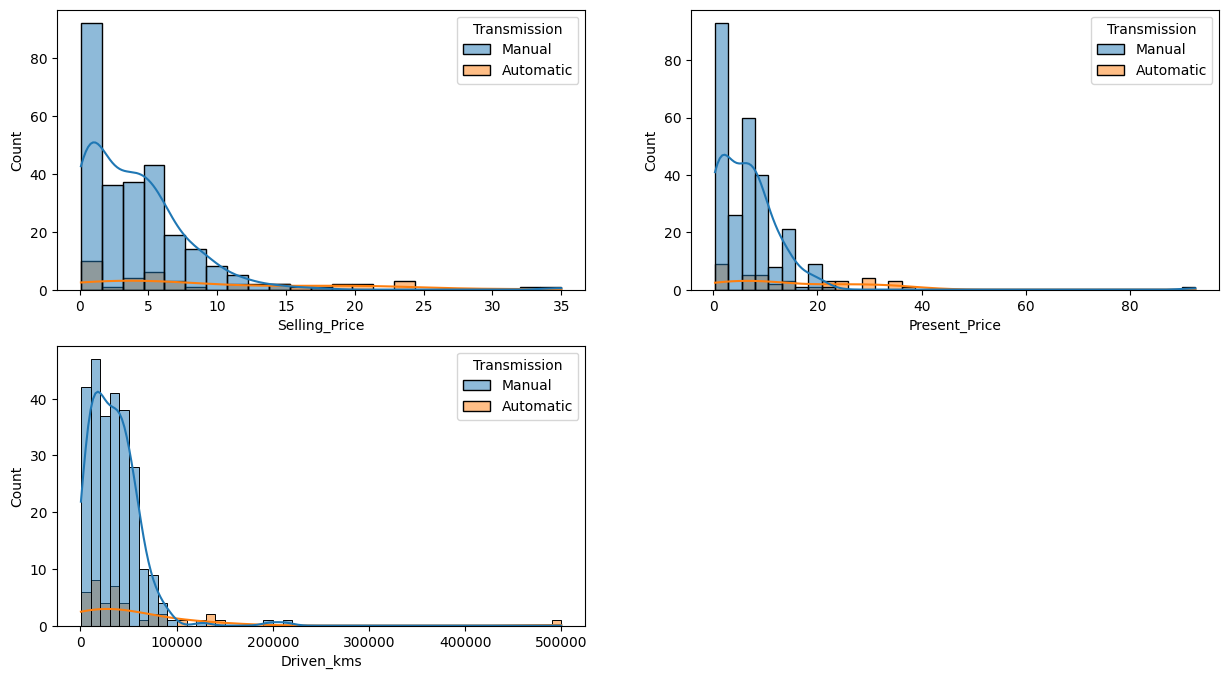

In [ ]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
plt.show()

In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
#Splitting the data and Target
X = df.drop(['Car_Name','Selling_Price','Owner'],axis=1)
Y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,0,0,0
1,2013,9.54,43000,1,0,0
2,2017,9.85,6900,0,0,0
3,2011,4.15,5200,0,0,0
4,2014,6.87,42450,1,0,0
...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0
297,2015,5.90,60000,0,0,0
298,2009,11.00,87934,0,0,0
299,2017,12.50,9000,1,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [ ]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
#Model Training
# loading the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# prediction on Training data
training_data_prediction = linear_reg_model.predict(X_train)

In [ ]:
training_data_prediction

array([ 7.32881092e-01,  1.00530737e+01,  5.93102782e+00,  2.59251623e+00,
        7.41401121e+00,  9.53878792e+00,  3.12957488e+00,  1.72096127e+00,
        1.97393743e+00,  6.44027104e+00,  7.68991797e+00,  4.36509844e+00,
        1.43773249e+00,  1.94983687e+00, -5.30169843e-01,  4.78818645e+00,
       -2.04384245e+00,  4.93432241e+00,  7.37697972e+00,  1.79806163e+00,
        1.61670370e+00,  2.40123841e+00,  4.37460773e+00,  8.14314428e+00,
        6.88855147e-01,  1.42603348e+01,  1.72500549e+00,  3.72200104e+00,
        1.81443332e+00,  5.62974623e+00,  7.43003745e-01,  9.01976025e-01,
        2.80931588e+00,  2.02169709e+00,  3.57096284e+00,  1.68371680e+00,
        3.12794261e+00, -1.97313048e+00,  2.00529793e+00,  2.09946521e+00,
        7.11715008e+00,  5.78375088e+00,  1.73951536e-01,  5.22932618e+00,
        2.75575068e+00,  6.53816650e-01,  9.67369886e+00,  4.88365001e+00,
        2.45336145e+00,  4.50879150e+00,  1.76383316e+00,  5.87374035e+00,
        5.30288871e+00,  

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8756123689539115
